In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [7]:
print('features: ', features[0], '\nlabel:', labels[0])

features:  tensor([-0.8625, -0.1172]) 
label: tensor([2.8799])


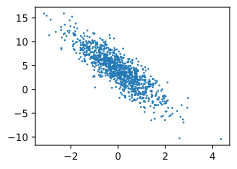

In [11]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(), 1)

In [17]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.0123, -0.2149],
        [-0.0108,  0.7610],
        [-0.9562, -0.0102],
        [-0.0289,  0.2804],
        [-1.0709,  1.4544],
        [ 0.7998, -0.7551],
        [-0.5464, -0.6783],
        [-0.5273, -0.5079],
        [ 1.9406,  0.0346],
        [ 0.2090,  0.9946]]) 
 tensor([[ 4.9075],
        [ 1.5748],
        [ 2.3200],
        [ 3.1939],
        [-2.8940],
        [ 8.3733],
        [ 5.4117],
        [ 4.8756],
        [ 7.9534],
        [ 1.2333]])


In [18]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [19]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [25]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [27]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [29]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean())}')

epoch 1, loss 0.00016440711624454707
epoch 2, loss 4.943439125781879e-05
epoch 3, loss 4.91528699058108e-05
